# Ön Hazırlık LAB-7

## Ad Soyad: Selin Ünlü

## Öğrenci No: 161024016

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 

import scipy.signal as sgnl
from scipy.fftpack import fft, ifft
%matplotlib notebook

import SystemFunction

from scipy.io import loadmat

##### 2.1 Faz cevabı ve grup gecikmesi 

##### Örnek-2:

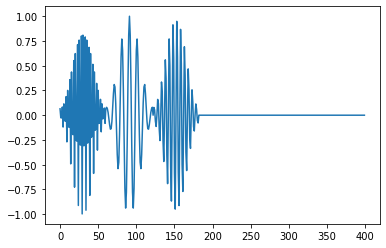

In [2]:
N  = 400
M  = 60
n  = np.arange(0, M+1, 1)
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M)

x1 = wn*np.cos(0.2*np.pi*n)
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

plt.figure()
plt.plot(xn)

In [3]:
w  = np.linspace(-np.pi, np.pi, N) 
Xw = fft(xn)
Xw_shifted = np.fft.fftshift(Xw)

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

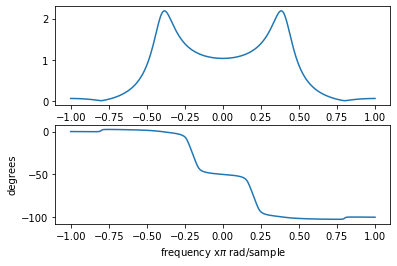

In [4]:
Hw, polezz, zerozz, K = SystemFunction.SystemFunction(w)

Hw_mag = abs(Hw)
Hw_phs =np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

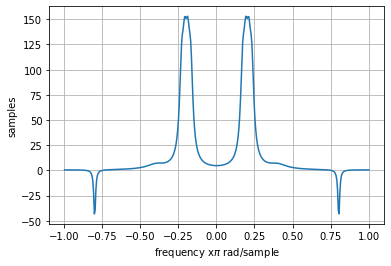

In [5]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency x$\pi$ rad/sample')
plt.ylabel('samples')
plt.grid()
plt.show()

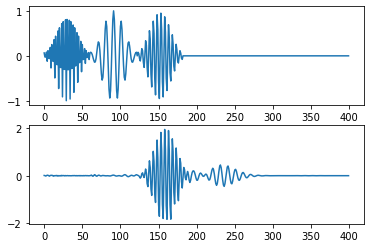

In [6]:
Yw_shifted = Hw * Xw_shifted
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(xn)
ax2.plot(yn)

##### 2.2 Lineer Fazlı FIR Filtreler 

##### Örnek-3:

Text(0, 0.5, 'phase (rad)')

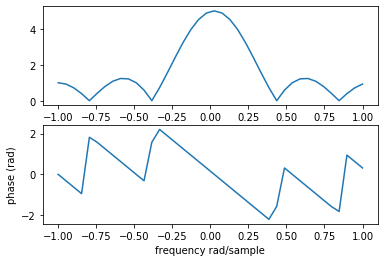

In [7]:
N  = 40
hn = np.ones(5)
Hw = np.fft.fftshift(fft(hn, N))

w  = np.linspace(-np.pi, np.pi, N)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase (rad)')

Text(0, 0.5, 'group delay (samples)')

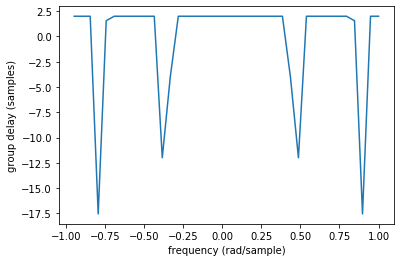

In [8]:
tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')

In [9]:
n  = np.arange(0, N, 1)
w0 = 0.1*np.pi
xn = np.cos(w0*n)

Xw = np.fft.fftshift(fft(xn,N))

Yw_shifted = Hw * Xw
Yw = np.fft.ifftshift(Yw_shifted)
yn = np.real(ifft(Yw))

(<StemContainer object of 3 artists>, None)

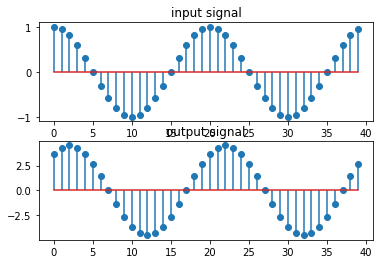

In [10]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.stem(n, xn, use_line_collection = True), ax1.title.set_text('input signal')
ax2.stem(n, yn, use_line_collection = True), ax2.title.set_text('output signal')

##### 3.2 PYFDA ile Filtre Tasarımı 

##### Örnek-4:

In [11]:
filter_data = loadmat('butterworth.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1]       

Text(0.5, 0, 'frequency x$\\pi$ rad/sample')

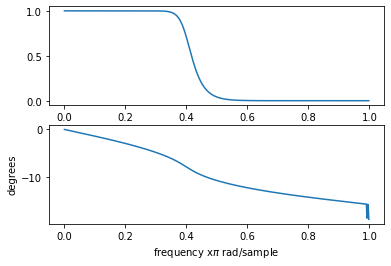

In [12]:
w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(w/np.pi, Hw_mag)
ax2.plot(w/np.pi, Hw_phs), plt.ylabel('degrees')
plt.xlabel('frequency x$\pi$ rad/sample')

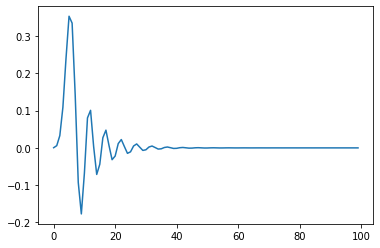

In [13]:
n, hn = sgnl.dimpulse((b,a,1), n=100)        
plt.figure()
plt.plot(n, np.squeeze(hn))

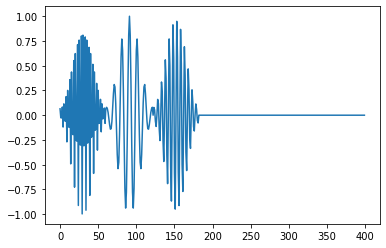

In [14]:
N = 400      
M = 60       
n1 = np.arange(0, M+1, 1)  
wn = 0.54 - 0.46*np.cos(2*np.pi*n1/M)     

x1 = wn*np.cos(0.2*np.pi*n1)             
x2 = wn*np.cos(0.4*np.pi*n1 - np.pi/2)    
x3 = wn*np.cos(0.8*np.pi*n1 - np.pi/5)    

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n1))), axis=None)

plt.figure()
plt.plot(xn)

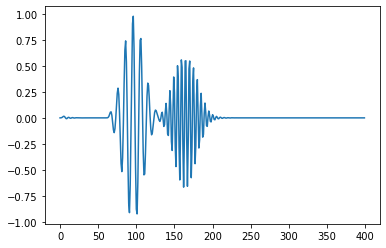

In [15]:
yn = sgnl.lfilter(b, a, xn)       

plt.figure()
plt.plot(yn)

# 4 ÖN HAZIRLIK SORULARI 

## SORU-1:

In [16]:
# coding: utf-8

# In[ ]:

# Copyright (c) 2020 Hasan Huseyin Sonmez
#
# The following code implements a pole-zero diagram for discrete-time signal/systems
# It has been written to mimic the "zplane" function of Mathworks' MATLAB software.
# it is aimed as a supplementary tool to be used in
# ELM368 Fundamentals of Digital Signal Processing-laboratory course.
# Gebze Technical University, Kocaeli, Turkey
#
# The function parameters are:
#     Input:
#            b : the numerator coefficients of the discrete-time signal/system
#            a : the denominator coefficients of the discrete-time signal/system
#


# In[29]:

# import the necessary libraries
import numpy as np              # for using basic array functions
import matplotlib.pyplot as plt # for this example, it may not be necessary

# the main package for signal processing is called "scipy" and we will use "signal" sub-package
import scipy.signal as sgnl 
# alternative syntax: from scipy import signal as sgnl

def zplane(b,a):

	# Input: numerator and denominator coefficients:
	zeross,poless,k = sgnl.tf2zpk(b, a)
	if not zeross.size:
		zeross = np.zeros(len(poless))
		
	if not poless.size:
		poless = np.zeros(len(zeross))

	tol = 1e-4

	real_p = np.real(poless).copy()
	real_z = np.real(zeross).copy()
	imag_p = np.imag(poless).copy()
	imag_z = np.imag(zeross).copy()

	if not real_z.size:
		real_z[abs(real_z) < tol] = 0
	if not imag_z.size:
		imag_z[abs(imag_z) < tol] = 0
	if not real_p.size:
		real_p[abs(real_p) < tol] = 0
	if not imag_p.size:
		imag_p[abs(imag_p) < tol] = 0

	z = np.round(real_z,2) + 1j*np.round(imag_z,2)
	p = np.round(real_p,2) + 1j*np.round(imag_p,2)

	# plot the unit circle
	N = 128
	m = np.arange(0,N,1)
	unitCircle = np.exp(1j*m*2*np.pi/N)

	plt.figure()
	plt.plot(np.real(unitCircle), np.imag(unitCircle), 'b--', linewidth=0.3)
	plt.xlabel('Real Part'), plt.ylabel('Imaginary Part')

	# calculate the plot limits
	Cz, z_counts = np.unique(z, return_counts=True)
	Cp, p_counts = np.unique(p, return_counts=True)

	zz = [idx1 for idx1, valz in enumerate(z_counts) if valz > 1]
	pp = [idx2 for idx2, valp in enumerate(p_counts) if valp > 1]
	zval = z_counts[zz]
	pval = p_counts[pp]
	zs = Cz[zz]
	ps = Cp[pp]

	real_roots = np.concatenate((np.real(p),np.real(z)))
	imag_roots = np.concatenate((np.imag(p),np.imag(z)))

	# adjust plot limits
	xlower = min(-1, min(real_roots)) - 0.3
	xupper = max(1,  max(real_roots)) + 0.3
	ylower = min(-1, min(imag_roots)) - 0.3
	yupper = max(1,  max(imag_roots)) + 0.3
	plt.xlim(xlower, xupper), plt.ylim(ylower, yupper)

	# plot axes
	Xaxis = np.arange(xlower, xupper, 0.1)
	Yaxis = np.arange(ylower, yupper, 0.1)
	plt.plot(np.real(Xaxis), np.imag(Xaxis), 'b--', linewidth=0.3)
	plt.plot(np.imag(Yaxis), np.real(Yaxis), 'b--', linewidth=0.3)

	# plot poles and zeros
	plt.plot(np.real(z), np.imag(z), 'ro',  markerfacecolor = 'none')
	plt.plot(np.real(p), np.imag(p), 'rx')

	if zz:
		txtz = str(zval)[1:-1]
		plt.annotate(txtz, xy=(np.real(zs)+0.1,np.imag(zs)+0.1))
		
	if pp:
		txtp = str(pval)[1:-1]
		plt.annotate(txtp, xy=(np.real(ps)+0.1,np.imag(ps)+0.1))

	plt.grid()
	plt.show()


# In[ ]:

### Type-1:

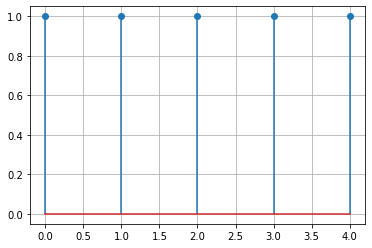

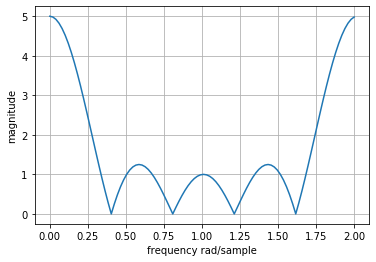

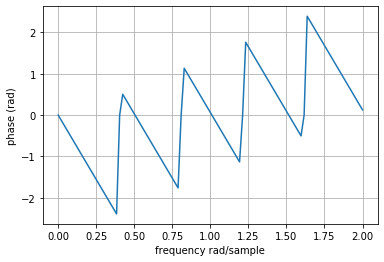

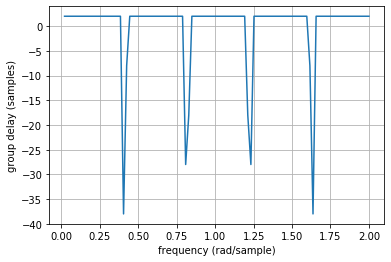

<Figure size 432x288 with 0 Axes>

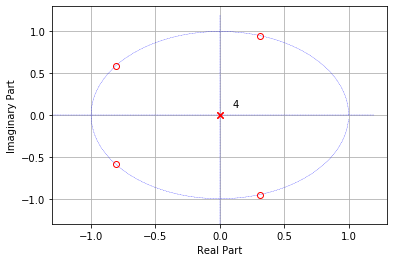

In [17]:
N1  = 100
n1  = ([0,1,2,3,4])
hn1 = np.array([1,1,1,1,1])

plt.figure()
plt.stem(n1, hn1, use_line_collection = True)
plt.grid()

Hw1 = np.fft.fft(hn1, N1)
w1  = np.linspace(0, 2*np.pi, N1)

Hw_mag1 = abs(Hw1)
Hw_phs1 = np.unwrap(np.angle(Hw1))

plt.figure()
plt.plot(w1/np.pi, Hw_mag1)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude')
plt.grid()

plt.figure()
plt.plot(w1/np.pi, Hw_phs1)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase (rad)')
plt.grid()

tau_w1 = -np.diff(Hw_phs1)*(N1/(2*np.pi))

plt.figure()
plt.plot(w1[1::]/np.pi, tau_w1)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.grid()

num = hn1
denum = np.array([1])

plt.figure()
zplane(num, denum)

plt.show()

#### Type-1 FIR filtremizin Genlik cevabında 0-π aralığına baktığımızda "Alçak Geçiren Filtre" özelliği göstermektedir. Düşük frekansları kuvvetlendirip, yüksek frekansları sönümlendirmektedir. Filtremiz lineer faza ve dolayısıyla sabit grup gecikmesine sahiptir. Kutup-Sıfır diyagramına baktığımızda sıfır konumlarının birim çember(r=|1|) üzerinde bulunduğunu görmekteyiz. Ayrıca z=1 ve z=-1 noktalarına baktığımızda bu noktalarda sıfırları bulunmamaktadır. Kutup-sıfır diyagramına baktığımızda  ω=0 ve  ω=π'de değil de ara açılarda sıfırları olduğu için yani bu noktalarda düşüş olması sebebiyle bu filtrenin "Alçak Geçiren Filtre", "Yüksek Geçiren Filtre", "Band Geçiren Filtre" veya "Band Söndüren Filtre"den biri olabileceğini gözlemliyoruz. Bu da genlik cevabını göz önünde bulundurarak yaptığımız çıkarımla uyuşmaktadır.

### Type-2:

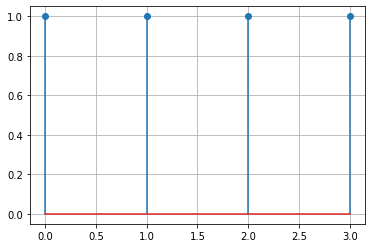

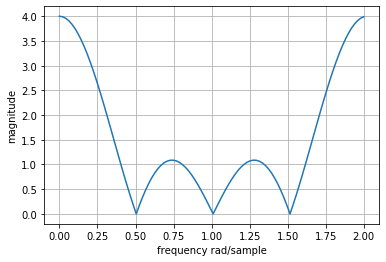

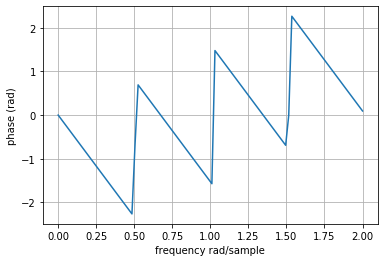

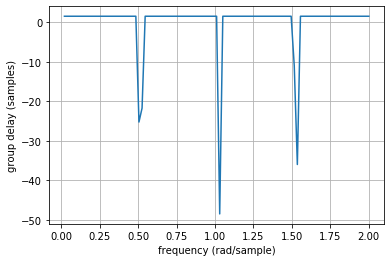

<Figure size 432x288 with 0 Axes>

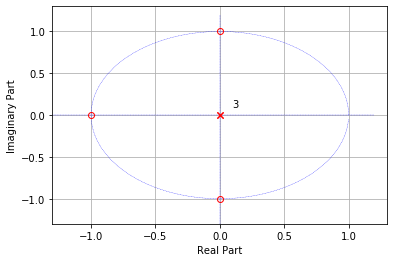

In [18]:
N2  = 100
n2  = ([0,1,2,3])
hn2 = np.array([1,1,1,1])

plt.figure()
plt.stem(n2, hn2, use_line_collection = True)
plt.grid()

Hw2 = np.fft.fft(hn2, N2)
w2  = np.linspace(0, 2*np.pi, N2)

Hw_mag2 = abs(Hw2)
Hw_phs2 = np.unwrap(np.angle(Hw2))

plt.figure()
plt.plot(w2/np.pi, Hw_mag2)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude')
plt.grid()

plt.figure()
plt.plot(w2/np.pi, Hw_phs2)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase (rad)')
plt.grid()

tau_w2 = -np.diff(Hw_phs2)*(N2/(2*np.pi))

plt.figure()
plt.plot(w2[1::]/np.pi, tau_w2)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.grid()

num = hn2
denum = np.array([1])

plt.figure()
zplane(num, denum)

plt.show()

#### Type-2 FIR filtremizin Genlik cevabına 0-π aralığına baktığımızda "Alçak Geçiren Filtre" özelliği göstermektedir. Düşük frekansları kuvvetlendirip, yüksek frekansları sönümlendirmektedir. Filtremiz lineer faza ve dolayısıyla sabit grup gecikmesine sahiptir. Kutup-Sıfır diyagramına baktığımızda sıfır konumlarının birim çember(r=|1|) üzerinde bulunduğunu görmekteyiz. z=-1'de tek katlı sıfır bulunmakta, z=1'de hiç sıfırı bulunmamaktadır. Kutup-Sıfır diyagramına baktığımızda sadece ω=π'de sıfırı bulunduğu için yani bu noktalarda düşüş olması sebebiyle bu filtrenin "Alçak Geçiren Filtre" veya "Band Geçiren Filtre"den biri olabileceğini söyleyebiliriz. Bu da genlik cevabını göz önünde bulundurarak yaptığımız çıkarımla uyuşmaktadır. 

### Type-3:

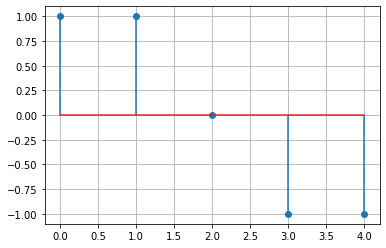

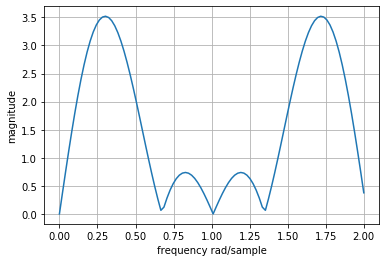

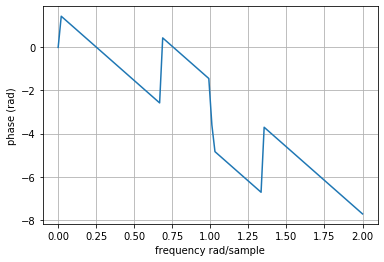

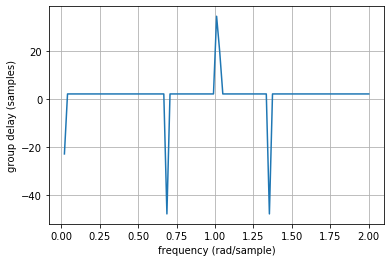

<Figure size 432x288 with 0 Axes>

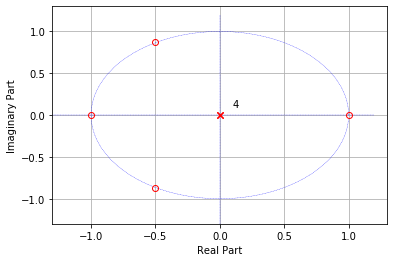

In [19]:
N3  = 100
n3  = ([0,1,2,3,4])
hn3 = np.array([1,1,0,-1,-1])

plt.figure()
plt.stem(n3, hn3, use_line_collection = True)
plt.grid()

Hw3 = np.fft.fft(hn3, N3)
w3  = np.linspace(0, 2*np.pi, N3)

Hw_mag3 = abs(Hw3)
Hw_phs3 = np.unwrap(np.angle(Hw3))

plt.figure()
plt.plot(w3/np.pi, Hw_mag3)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude')
plt.grid()

plt.figure()
plt.plot(w3/np.pi, Hw_phs3)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase (rad)')
plt.grid()

tau_w3 = -np.diff(Hw_phs3)*(N3/(2*np.pi))

plt.figure()
plt.plot(w3[1::]/np.pi, tau_w3)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.grid()

num = hn3
denum = np.array([1])

plt.figure()
zplane(num, denum)

plt.show()

#### Type-3 FIR filtremizin Genlik cevabına 0-π aralığına baktığımızda "Band Geçiren Filtre" özelliği göstermektedir. Alt ve üst frekans limitleri dışında kalan noktalardaki sinyalleri bastırıp belirtilen aralıklardaki sinyallere dokunmamaktadır. Filtremiz lineer faza ve dolayısıyla sabit grup gecikmesine sahiptir. Kutup-Sıfır diyagramına baktığımızda sıfır konumlarının birim çember(r=|1|) üzerinde bulunduğunu görmekteyiz. z=1 ve z=-1 noktalarında tek katlı sıfırları bulunmaktadır. Kutup-Sıfır diyagramına baktığımızda ω=0 ve ω=π'de tek katlı sıfırları olduğu için yani bu noktalarda düşüş olması sebebiyle bu filtrenin "Band Geçiren Filtre" olduğu aşikardır. Bu da genlik cevabını göz önünde bulundurarak yaptığımız çıkarımla uyuşmaktadır. 

### Type-4:

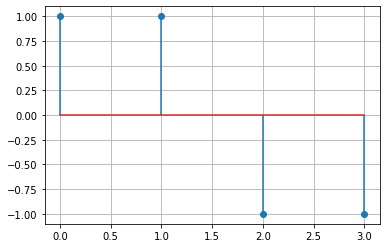

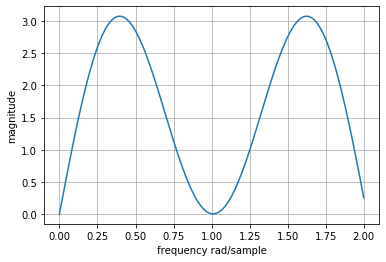

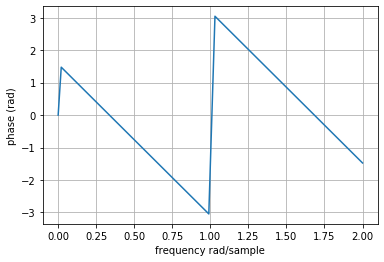

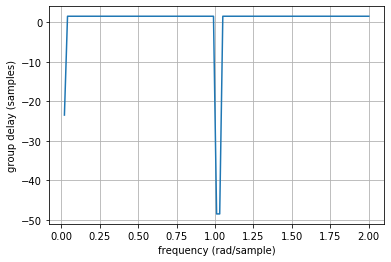

<Figure size 432x288 with 0 Axes>

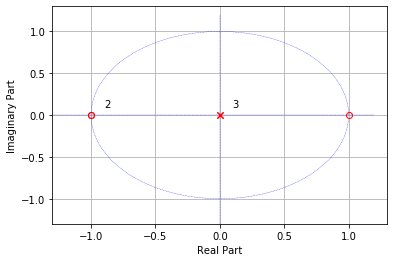

In [20]:
N4  = 100
n4  = ([0,1,2,3])
hn4 = np.array([1,1,-1,-1])

plt.figure()
plt.stem(n4, hn4, use_line_collection = True)
plt.grid()

Hw4 = np.fft.fft(hn4, N4)
w4  = np.linspace(0, 2*np.pi, N4)

Hw_mag4 = abs(Hw4)
Hw_phs4 = np.unwrap(np.angle(Hw4))

plt.figure()
plt.plot(w4/np.pi, Hw_mag4)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude')
plt.grid()

plt.figure()
plt.plot(w4/np.pi, Hw_phs4)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase (rad)')
plt.grid()

tau_w4 = -np.diff(Hw_phs4)*(N4/(2*np.pi))

plt.figure()
plt.plot(w4[1::]/np.pi, tau_w4)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay (samples)')
plt.grid()

num = hn4
denum = np.array([1])

plt.figure()
zplane(num, denum)

plt.show()

#### Type-4 FIR filtremizin Genlik cevabına 0-π aralığına baktığımızda "Band Geçiren Filtre" özelliği göstermektedir. Alt ve üst frekans limitleri dışında kalan noktalardaki sinyalleri bastırıp belirtilen aralıklardaki sinyallere dokunmamaktadır. Filtremiz lineer faza ve dolayısıyla sabit grup gecikmesine sahiptir. Kutup-Sıfır diyagramına baktığımızda sıfır konumlarının birim çember(r=|1|) üzerinde bulunduğunu görmekteyiz. z=1'de tek katlı ve z=-1'de çift katlı sıfırı bulunmaktadır. Kutup-Sıfır diyagramına baktığımızda ω=0'da tek katlı, ω=π'de sıfırları olduğu için yani bu noktalarda düşüş olması sebebiyle bu filtre ya "Yüksek Geçiren Filtre" ya da "Band Geçiren Filtre" olabilir. Bu da genlik cevabını göz önünde bulundurarak yaptığımız çıkarımla uyuşmaktadır.

## SORU-2:

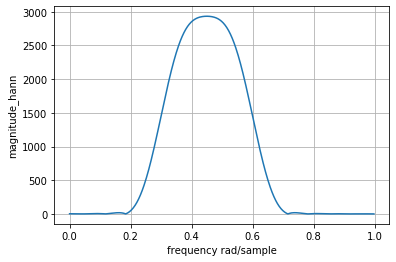

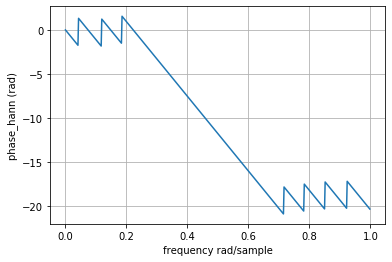

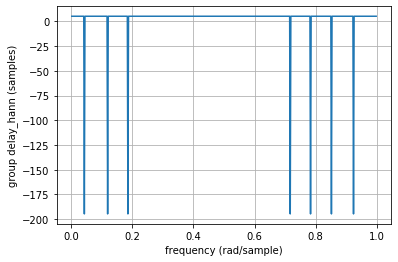

In [21]:
filter_data = loadmat('BPF_hann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_hann')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_hann (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_hann (samples)')
plt.grid()
plt.show()

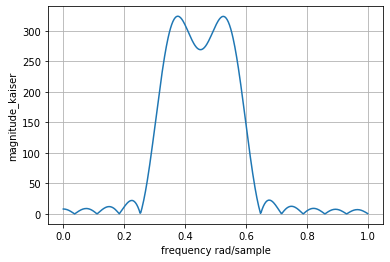

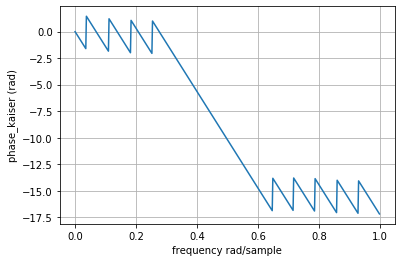

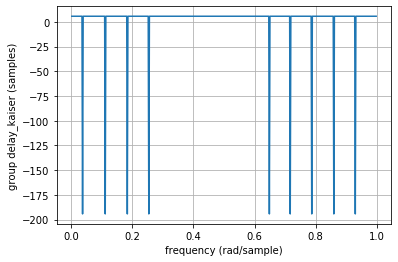

In [22]:
filter_data = loadmat('BPF_kaiser.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_kaiser')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_kaiser (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_kaiser (samples)')
plt.grid()
plt.show()

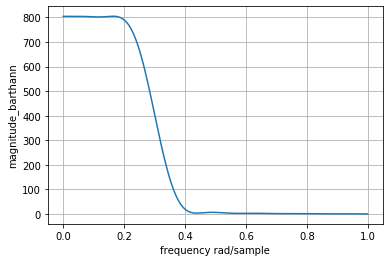

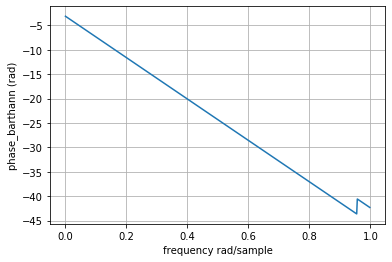

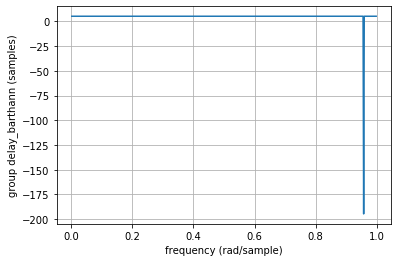

In [23]:
filter_data = loadmat('LPF_barthann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_barthann')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_barthann (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_barthann (samples)')
plt.grid()
plt.show()

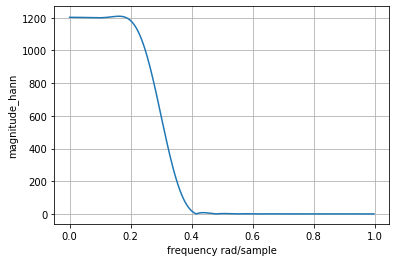

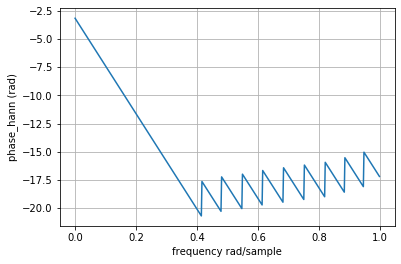

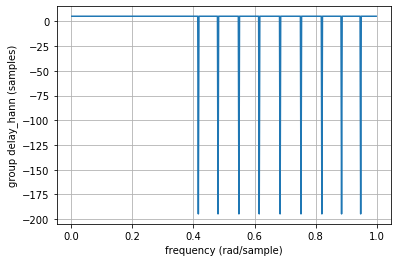

In [24]:
filter_data = loadmat('LPF_hann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_hann')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_hann (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_hann (samples)')
plt.grid()
plt.show()

#### Kaiser filtresinin hem durdurma hem de geçirme bantlarında dalgalanma dalgalanmalar bulunur. Üstte çizdirilen filtrelerimiz lineer faza ve sabit grup gecikmesine sahiptir. 

## SORU-3:

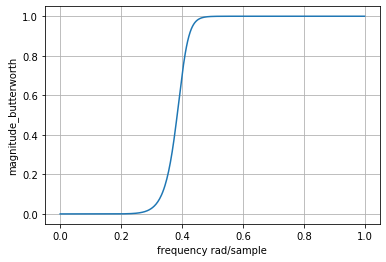

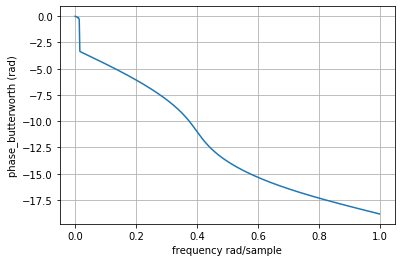

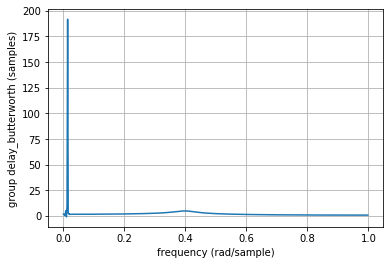

In [25]:
filter_data = loadmat('HPF_butterworth.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_butterworth')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_butterworth (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_butterworth (samples)')
plt.grid()
plt.show()

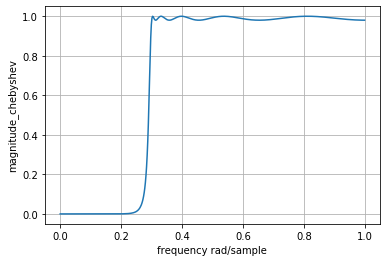

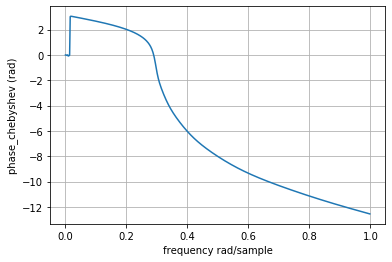

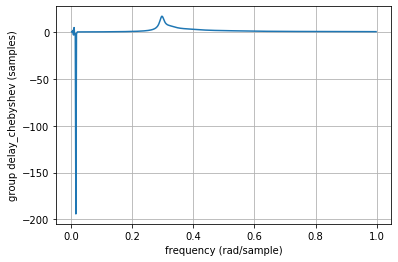

In [26]:
filter_data = loadmat('HPF_chebyshev1.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_chebyshev')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_chebyshev (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_chebyshev (samples)')
plt.grid()
plt.show()

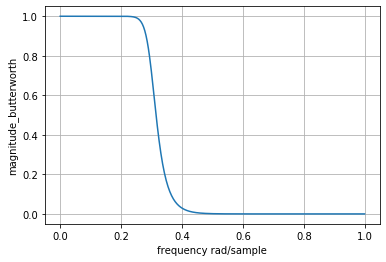

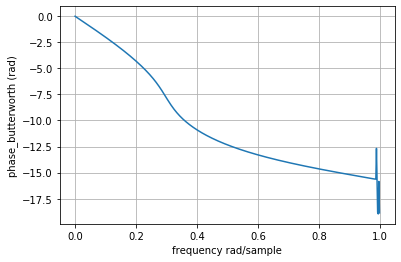

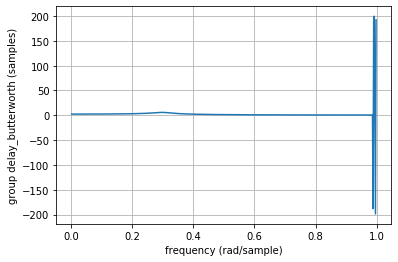

In [27]:
filter_data = loadmat('LPF_butterworth.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_butterworth')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_butterworth (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_butterworth (samples)')
plt.grid()
plt.show()

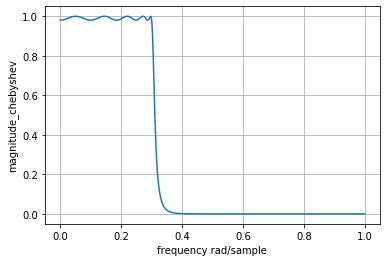

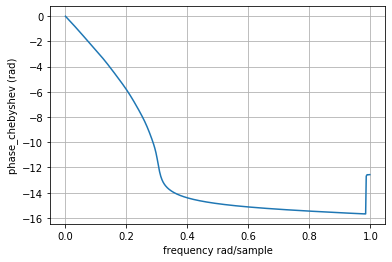

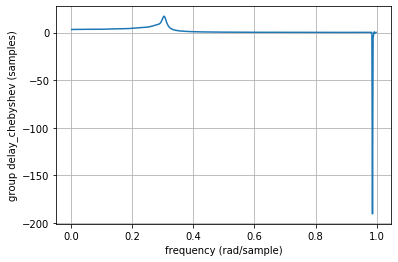

In [28]:
filter_data = loadmat('LPF_chebyshev.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1]       

w, Hw = sgnl.freqz(b,a)

Hw_mag = abs(Hw)
Hw_phs = np.unwrap(np.angle(Hw))

tau_w = -np.diff(Hw_phs)*(N/(2*np.pi))

plt.figure()
plt.plot(w/np.pi, Hw_mag)
plt.xlabel('frequency rad/sample')
plt.ylabel('magnitude_chebyshev')
plt.grid()

plt.figure()
plt.plot(w/np.pi, Hw_phs)
plt.xlabel('frequency rad/sample')
plt.ylabel('phase_chebyshev (rad)')
plt.grid()

plt.figure()
plt.plot(w[1::]/np.pi, tau_w)
plt.xlabel('frequency (rad/sample)')
plt.ylabel('group delay_chebyshev (samples)')
plt.grid()
plt.show()

#### Butterworth hem geçirme hem de durdurma bandında düz tepki, ancak geniş bir geçiş bölgesine sahiptir. Chebyshev durdurma bandında düşük dalgalanma miktarına sahiptir, ancak geniş geçiş bandına sahiptir. Üstte çizdirilen filtrelerimiz lineer olmayan faza sahiptir. Girişine uygulanan işaretin tüm frekans bileşenleri üzerinde aynı miktarda zaman gecikmesi olmamaktadır. Bu da distortion'ları beraberizde getirmektedir. 

## SORU-4:

### FIR - Band Geçiren Filtre

In [29]:
N  = 400
M  = 60
n  = np.arange(0, M+1, 1)
wn = 0.54 - 0.46*np.cos(2*np.pi*n/M)

x1 = wn*np.cos(0.2*np.pi*n)
x2 = wn*np.cos(0.4*np.pi*n - np.pi/2)
x3 = wn*np.cos(0.8*np.pi*n - np.pi/5)

xn = np.concatenate((x3, x1, x2, np.zeros(N-3*len(n))), axis=None)

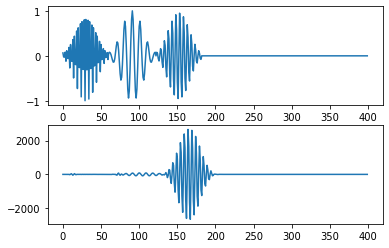

In [30]:
filter_data = loadmat('bpf_hann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

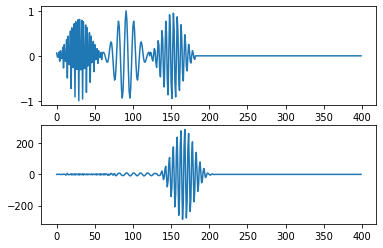

In [31]:
filter_data = loadmat('bpf_kaiser.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

#### "Band Geçiren Filtre" kullandığımız için alt ve üst frekans limitleri dışında kalan noktalardaki sinyalleri bastırıp belirtilen aralıklardaki sinyallere dokunmamasını bekleriz. Ve beklediğimiz gibi bir sonuçla karşılaştık. Hann Filtresi, Kaiser Filtesine göre genliği daha fazla kuvvetlendirmektedir.  Filtremiz lineer faza ve bunun getirmişolduğu  sabit grup gecikmesine sahiptir. Daha fazla terime sahip bir filtrenin (yani, daha yüksek bir mertebe) geçirilen frekanslar ile durdurulan frekanslar arasında daha keskin bir geçiş vardır. Mertebeyi arttırmak, filtreyi daha keskin hale getirir. Bu daha fazla hesaplama gerektirir ve filtre tarafından kaynaklanan zamanda gecikmeye neden olur ve dürtü cevabındaki yan lobların seviyesi artar.

### FIR - Alçak Geçiren Filtre

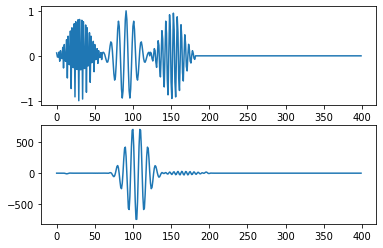

In [32]:
filter_data = loadmat('LPF_barthann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

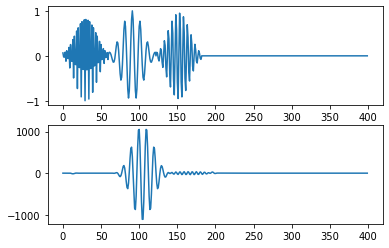

In [33]:
filter_data = loadmat('LPF_hann.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

#### "Alçak Geçiren Filtre" kullandığımız için düşük frekansları kuvvetlendirip, yüksek frekansları sönümlendirmesini bekleriz.  Ve beklediğimiz gibi bir sonuçla karşılaştık. Hann Filtresi, Barthann Filtesine göre genliği daha fazla kuvvetlendirmektedir. Filtremiz lineer faza ve bunun getirmiş olduğu  sabit grup gecikmesine sahiptir. Daha fazla terime sahip bir filtrenin (yani, daha yüksek bir mertebe) geçirilen frekanslar ile durdurulan frekanslar arasında daha keskin bir geçiş vardır. Mertebeyi arttırmak, filtreyi daha keskin hale getirir. Bu daha fazla hesaplama gerektirir ve filtre tarafından kaynaklanan zamanda gecikmeye neden olur ve dürtü cevabındaki yan lobların seviyesi artar.

### IIR - Yüksek Geçiren Filtre

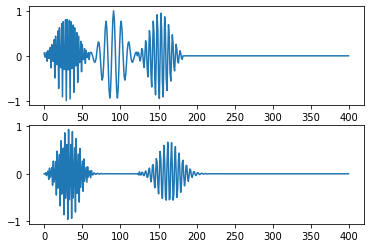

In [34]:
filter_data = loadmat('HPF_butterworth.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

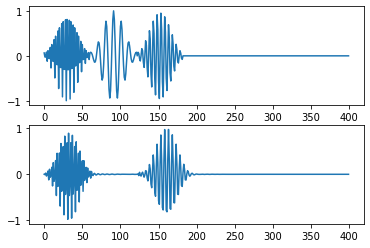

In [35]:
filter_data = loadmat('HPF_chebyshev1.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

#### "Yüksek Geçiren Filtre" kullandığımız için yüksek frekansları kuvvetlendirip, düşük frekansları sönümlendirmesini bekleriz.  Ve beklediğimiz gibi bir sonuçla karşılaştık. Chebysev1 Filtresi, Butterworth Filtesine göre genliği daha fazla kuvvetlendirmektedir. Filtremiz lineer olmayan faza sahiptir. Girişine uygulanan işaretin tüm frekans bileşenleri üzerinde aynı miktarda zaman gecikmesi olmamaktadır. Bu da distortion'ları beraberizde getirmektedir. Daha fazla terime sahip bir filtrenin (yani, daha yüksek bir mertebe) geçirilen frekanslar ile durdurulan frekanslar arasında daha keskin bir geçiş vardır. Mertebeyi arttırmak, filtreyi daha keskin hale getirir. Bu daha fazla hesaplama gerektirir ve filtre tarafından kaynaklanan zamanda gecikmeye neden olur ve dürtü cevabındaki yan lobların seviyesi artar.

### IIR - Alçak Geçiren Filtre

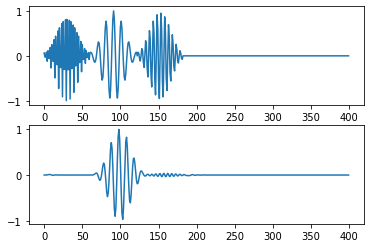

In [36]:
filter_data = loadmat('LPF_butterworth.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

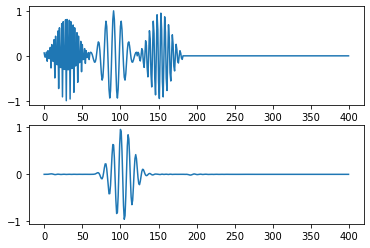

In [38]:
filter_data = loadmat('LPF_chebyshev.mat')      
Coeffs = filter_data['ba'].astype(np.float)   

b = Coeffs[:,0]       
a = Coeffs[:,1] 

yn = sgnl.lfilter(b, a, xn)  

plt.figure()

plt.subplot(2,1,1)
plt.plot(xn)

plt.subplot(2,1,2)
plt.plot(yn)

plt.show()

#### "Alçak Geçiren Filtre" kullandığımız için düşük frekansları kuvvetlendirip, yüksek frekansları sönümlendirmesini bekleriz.  Ve beklediğimiz gibi bir sonuçla karşılaştık. Butterworth Filtresi, Chebyshev Filtesine göre ripple'ları daha iyi sönümlemektedir. Filtremiz lineer olmayan faza sahiptir.  Girişine uygulanan işaretin tüm frekans bileşenleri üzerinde aynı miktarda zaman gecikmesi olmamaktadır. Bu da distortion'ları beraberizde getirmektedir. Daha fazla terime sahip bir filtrenin (yani, daha yüksek bir mertebe) geçirilen frekanslar ile durdurulan frekanslar arasında daha keskin bir geçiş vardır. Mertebeyi arttırmak, filtreyi daha keskin hale getirir. Bu daha fazla hesaplama gerektirir ve filtre tarafından kaynaklanan zamanda gecikmeye neden olur ve dürtü cevabındaki yan lobların seviyesi artar.